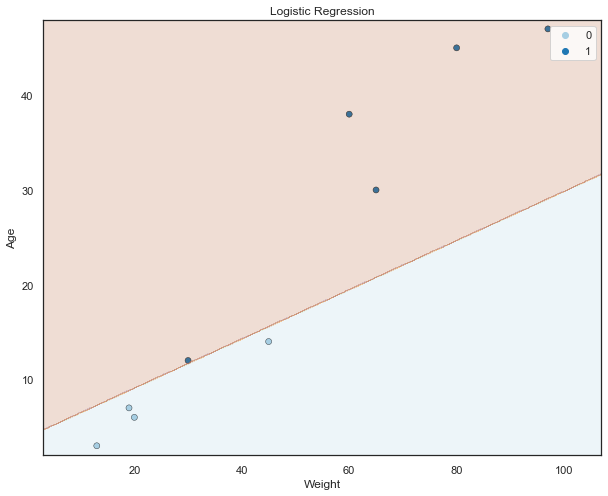

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Input data
X = np.array([[30, 12],
              [45, 14],
              [65, 30],
              [80, 45],
              [97, 47],
              [60, 38],
              [20, 6],
              [13, 3],
              [19, 7]])

y = np.array([1, 0, 1, 1, 1, 1, 0, 0, 0])

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Generate a mesh grid of points for plotting
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set the plot style using seaborn
sns.set(style="white")

# Plot the training data points
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Paired", edgecolor='k')

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap="Paired")

# Add axis labels and a title
plt.xlabel('Weight')
plt.ylabel('Age')
plt.title('Logistic Regression')

# Show the plot
plt.show()


Confusion Matrix:
[[14  5]
 [ 3 18]]


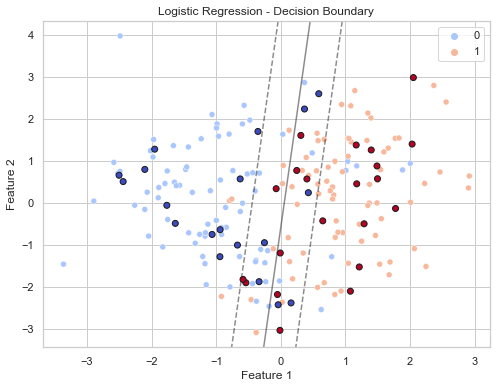

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate synthetic classification data
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the decision boundary and the data points
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolors="k")

# Add labels and a title to the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression - Decision Boundary")

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Show the plot
plt.show()
